In [2]:
%pip install numpy pandas matplotlib

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
    --------------------------------------- 0.3/12.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.8 MB 932.9 kB/s eta 0:00:14
   -- ------------------------------------- 0.8/12.8 MB 907.1 kB/s eta 0:00:14
   --- ------------------------------------ 1.0/12.8 MB 986.7 kB/s eta 0:00:12
   ---- ----------------------------------- 1.3/12.8 MB 1.1 MB/s eta 0:00:11
   ---- ----------------------------------- 1.6/12.8 MB 1.1 MB/s eta 0:00:10
   ----- ---------------------------------- 1.8/12.8 MB 1.2 MB/s eta 0:00:10
   ----- ---------------------------------- 1.8/12.8 MB 1.2 MB/s eta 0:00:10
   ------ --------------------------------- 2.1/12

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print("OK")

OK


checking data

In [ ]:
import pandas as pd
df=pd.read_csv("laptop_price - dataset.csv")
#check data
print(df.shape)
print(df.columns)
print(df.isna().sum())
print(df.describe())

(1275, 15)
Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)'],
      dtype='object')
Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64
            Inches  CPU_Frequency (GHz)     RAM (GB)  Weight (kg)  \
count  1275.000000          1275.000000  1275.000000  1275.000000   
mean     15.022902             2.302980     8.440784     2.040525   
std       1.429470             0.503846     5.097809     0.669196   
min      10.100000             0.900000     2.000000     0.690000   
25%      

Plot the price of all the laptops



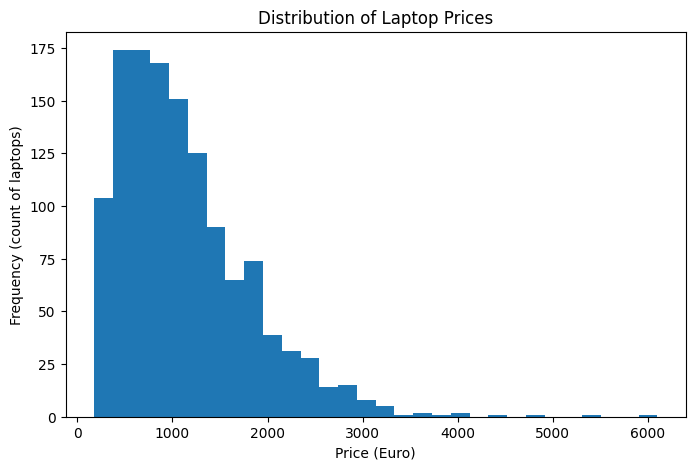

Number of laptops plotted: 1275
Min/Mean/Max price (Euro): 174.0 1134.9690588235292 6099.0


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("laptop_price - dataset.csv")

# Ensure the price column exists
price_col = "Price (Euro)"
assert price_col in df.columns, f"Column '{price_col}' not found. Available columns: {df.columns.tolist()}"

# Convert price to numeric (in case there are non-numeric values) and drop missing values
prices = pd.to_numeric(df[price_col], errors="coerce").dropna()

# Plot a histogram to visualize the price distribution
plt.figure(figsize=(8, 5))
plt.hist(prices, bins=30)

plt.title("Distribution of Laptop Prices")
plt.xlabel("Price (Euro)")
plt.ylabel("Frequency (count of laptops)")

plt.show()

# Optional: quick summary for documentation
print("Number of laptops plotted:", len(prices))
print("Min/Mean/Max price (Euro):", prices.min(), prices.mean(), prices.max())


Which company has on average the most expensive laptop? What is the average laptop price for each company?


In [5]:
import pandas as pd

df = pd.read_csv("laptop_price - dataset.csv")

# Make sure price is numeric (handles strings / missing values safely)
df["Price (Euro)"] = pd.to_numeric(df["Price (Euro)"], errors="coerce")

# Compute average price per company
company_avg = (
    df.groupby("Company")["Price (Euro)"]
      .mean()
      .sort_values(ascending=False)
)

# Company with the highest average price
top_company = company_avg.index[0]
top_avg_price = company_avg.iloc[0]

print("Company with highest average price:", top_company)
print("Average price (Euro):", top_avg_price)

# Show the average price for each company
company_avg

Company with highest average price: Razer
Average price (Euro): 3346.1428571428573


Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64

Find the different types of Operating systems present in the data - under the column name "OpSys".
Please note - there are operating systems that are the same systems and just written differently in the column - please fix them to be uniform


In [6]:
# Create a new cleaned OS column (do not overwrite the original)
df["OpSys_clean"] = df["OpSys"].astype("string").str.strip().str.lower()

# Standardize different spellings into the same OS label
df["OpSys_clean"] = df["OpSys_clean"].replace({
    "mac os": "macos",
    "macos x": "macos",
    "mac os x": "macos",
    "no os installed": "no os",
    "windows 10": "windows",
    "windows 7": "windows",
    "windows 10 s": "windows",})

# Show the final OS categories
df["OpSys_clean"].value_counts()


OpSys_clean
windows      1101
no os          66
linux          58
chrome os      27
macos          21
android         2
Name: count, dtype: Int64

 Plot for each of the operating system types the distribution of the prices, so that the number of plots equals to the number of unique operating systems.


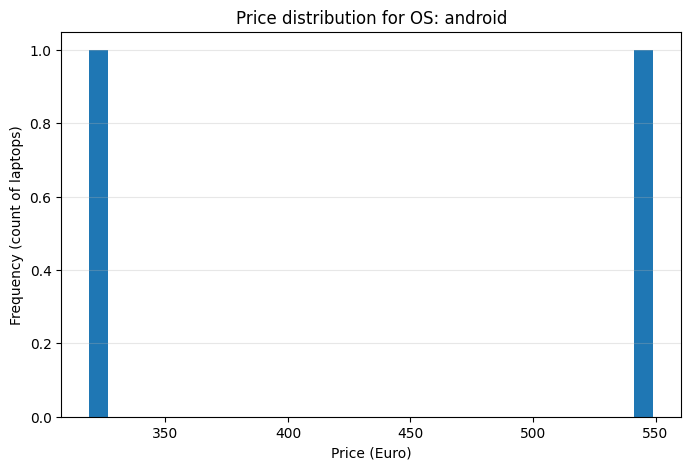

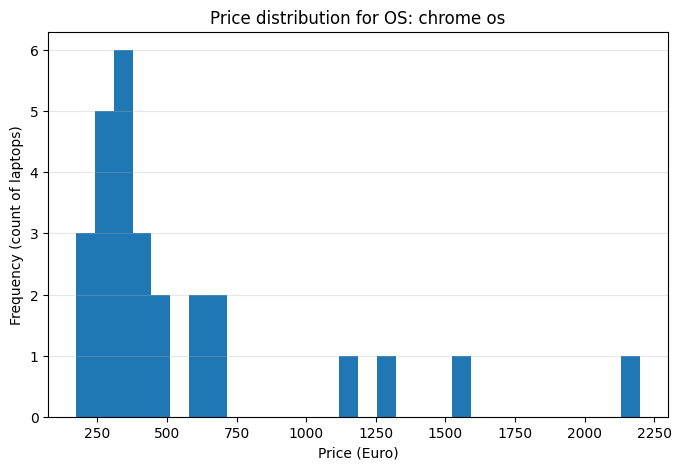

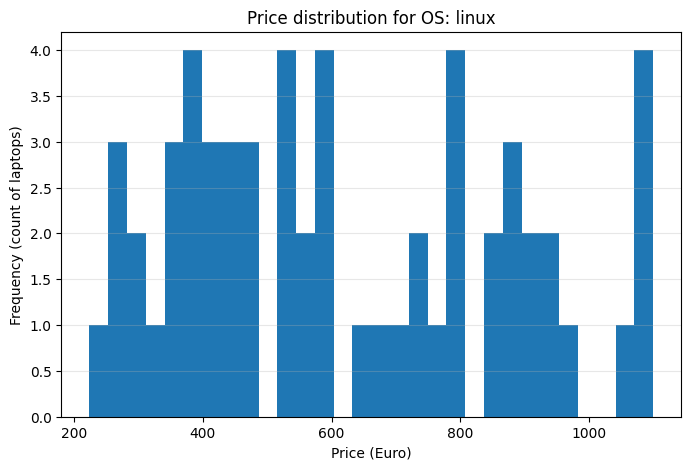

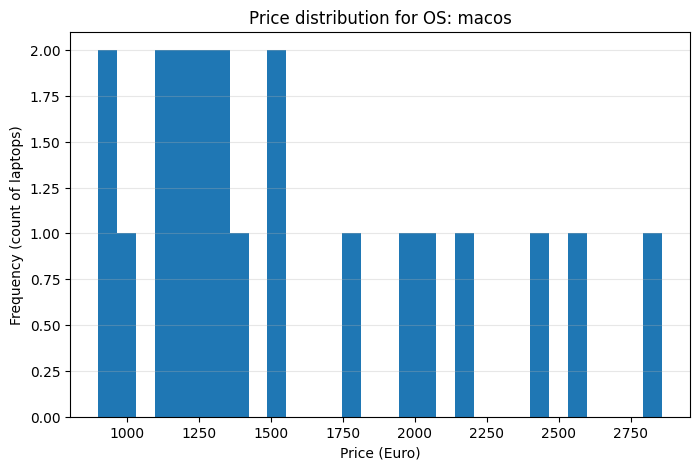

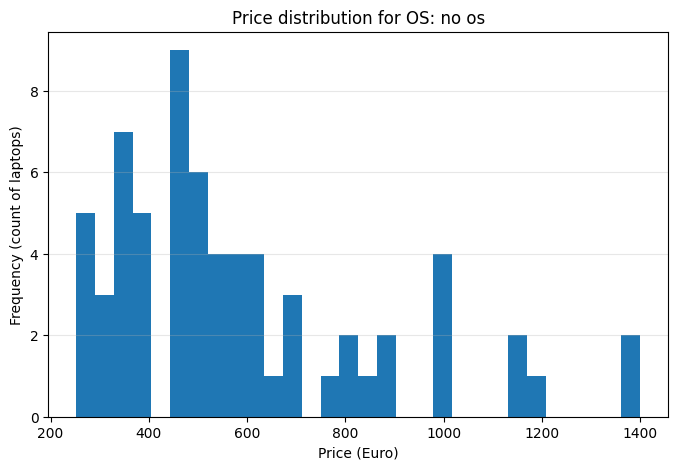

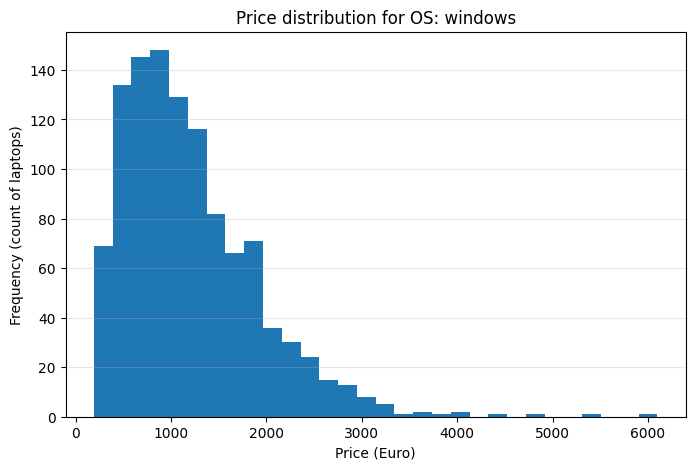

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("laptop_price - dataset.csv")

# Standardize OS labels (lowercase + trim whitespace)
df["OpSys_clean"] = df["OpSys"].astype("string").str.strip().str.lower()

# Map common variants to a uniform naming scheme
df["OpSys_clean"] = df["OpSys_clean"].replace({
    "mac os": "macos",
    "mac os x": "macos",
    "macos x": "macos",
    "no os installed": "no os",
    "windows10": "windows",
    "windows 10": "windows",
    "windows 7": "windows",
    "windows 10 s": "windows",
})

# One plot per operating system (required by the assignment)
unique_os = sorted(df["OpSys_clean"].dropna().unique())

#plot in for loop
for os_name in unique_os:
    prices = df.loc[df["OpSys_clean"] == os_name, "Price (Euro)"].dropna()

    plt.figure(figsize=(8, 5))
    plt.hist(prices, bins=30)
    plt.title(f"Price distribution for OS: {os_name}")
    plt.xlabel("Price (Euro)")
    plt.ylabel("Frequency (count of laptops)")
    plt.grid(True, axis="y", alpha=0.3)
    plt.show()


What is the relationship between RAM and computer price? add an adequate plot to support your findings. <<< check data for outliers, what would be considered as an outlier? How will you detect it ? >>>

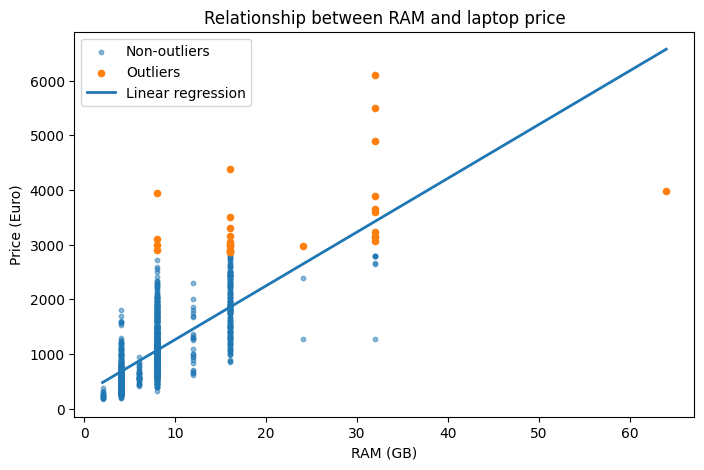

Number of price outliers: 28


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("laptop_price - dataset.csv")

# Define variables FIRST
x = pd.to_numeric(df["RAM (GB)"], errors="coerce")
y = pd.to_numeric(df["Price (Euro)"], errors="coerce")

# Remove missing values
mask = x.notna() & y.notna()
x = x[mask]
y = y[mask]

# Detect outliers using IQR (price)
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_mask = (y < lower_bound) | (y > upper_bound)

# Fit regression using non-outliers
m, b = np.polyfit(x[~outlier_mask], y[~outlier_mask], 1)

x_line = np.linspace(x.min(), x.max(), 100)
y_line = m * x_line + b

# Plot
plt.figure(figsize=(8, 5))

plt.scatter(x[~outlier_mask], y[~outlier_mask], s=10, alpha=0.5, label="Non-outliers")
plt.scatter(x[outlier_mask], y[outlier_mask], s=20, label="Outliers")

plt.plot(x_line, y_line, linewidth=2, label="Linear regression")

plt.xlabel("RAM (GB)")
plt.ylabel("Price (Euro)")
plt.title("Relationship between RAM and laptop price")
plt.legend()
plt.show()

print("Number of price outliers:", outlier_mask.sum())

Create a new column for the dataframe called "Storage type" that extracts the storage type from the column "Memory".

In [13]:
import pandas as pd

# Load the dataset from CSV
df = pd.read_csv("laptop_price - dataset.csv")

# Function to extract the storage technology from the "Memory" column
def extract_storage_type(memory):
    # Handle missing values to avoid errors when calling string methods
    if pd.isna(memory):
        return "Other"

    # Convert text to lowercase for consistent matching
    memory = memory.lower()

    # Check for combinations of storage types
    if "ssd" in memory and "hdd" in memory:
        return "Hybrid"   # Combination of SSD and HDD
    elif "ssd" in memory:
        return "SSD"
    elif "hdd" in memory:
        return "HDD"
    elif "flash" in memory:
        return "Flash"
    else:
        return "Other"    # Any storage type not covered above

# Create a new column with the extracted storage type
df["Storage type"] = df["Memory"].apply(extract_storage_type)


# Show output (choose one)
df[["Memory", "Storage type"]].head(10)
# df["Storage type"].value_counts()

,Memory,Storage type
0,128GB SSD,SSD
1,128GB Flash Storage,Flash
2,256GB SSD,SSD
3,512GB SSD,SSD
4,256GB SSD,SSD
5,500GB HDD,HDD
6,256GB Flash Storage,Flash
7,256GB Flash Storage,Flash
8,512GB SSD,SSD
9,256GB SSD,SSD
